In [12]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import Orange

In [13]:
DATA_FILE = 'bhh_variant_discounted_rewards.csv'
DATA_FILEPATH = os.path.abspath(os.path.join(os.getcwd(), DATA_FILE))
print(DATA_FILEPATH)
DATASETS = [
	'iris',
	'fish_toxicity',
	'abalone',
	'air_quality',
	'housing',
	'wine_quality',
	'car',
	'parkinsons',
	'forest_fires',
	'bank',
	'bike',
	'student_performance',
	'adult',
	'mushroom',
	'diabetic'
]
CATEGORICAL_DATASETS = [
	'iris',
	'abalone',
	'wine_quality',
	'car',
	'bank',
	'adult',
	'mushroom',
	'diabetic'
]
HEURISTICS = [
	'bhh_gd_only',
	'bhh'
]
DISCOUNTED_REWARDSS = [
	False,
	True
]
COLUMNS = [
	'id',
	'dataset',
	'heuristic_type',
	'heuristic',
	'is_baseline',
	'population',
	'burn_in',
	'replay',
	'reselection',
	'reanalysis',
	'normalisation',
	'credit',
	'discounted_rewards',
	'run',
	'step',
	'train_loss',
	'train_accuracy',
	'test_loss',
	'test_accuracy',
	'rank'
]
DTYPE = {
	'id': 'object',
	'dataset': 'object',
	'heuristic_type': 'object',
	'heuristic': 'object',
	'is_baseline': 'boolean',
	'population': 'object',
	'burn_in': 'object',
	'replay': 'object',
	'reselection': 'object',
	'reanalysis': 'object',
	'normalisation': 'boolean',
	'credit': 'object',
	'discounted_rewards': 'boolean',
	'run': 'Int32',
	'step': 'Int32',
	'train_loss': 'float32',
	'train_accuracy': 'float32',
	'test_loss': 'float32',
	'test_accuracy': 'float32',
	'rank': 'float32',
}

/Users/arneschreuder/Development/personal/masters.ai/analysis/bhh_variant_discounted_rewards/bhh_variant_discounted_rewards.csv


## Load data

In [14]:
data = pd.read_csv(DATA_FILEPATH, names=COLUMNS, dtype=DTYPE, skiprows=1)

## Plot Critical Difference

### For all datasets

abalone
bhh_gd_only
Errored
parkinsons
bhh_gd_only
Errored
bank
bhh_gd_only
Errored
bike
bhh_gd_only
Errored
adult
bhh_gd_only
Errored


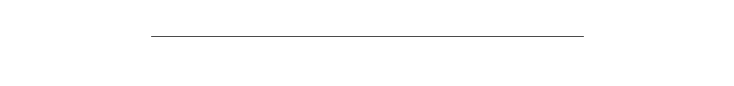

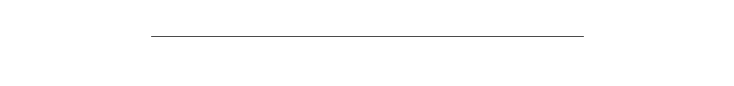

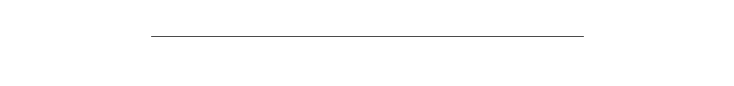

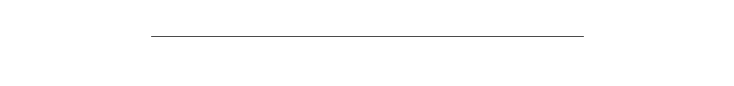

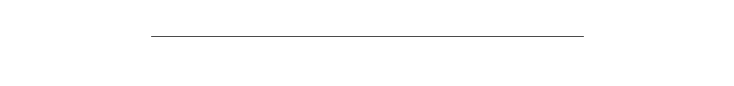

In [15]:
plt.rcParams.update({'font.size': 14})

for d, dataset in enumerate(DATASETS):
	for h, heuristic in enumerate(HEURISTICS):
		try:
			query = '(dataset == "{}") and (heuristic == "{}") and (step == 20)'.format(dataset, heuristic)
			subset = data.query(query)

			pivot = pd.pivot_table(subset, values='rank',
												columns=['discounted_rewards'], aggfunc=np.mean, fill_value=0)

			names = [key for key, value in pivot.items()]
			avg_ranks = [pivot[key]['rank'] for key, value in pivot.items()]
			cd = Orange.evaluation.compute_CD(avg_ranks, 10) #tested on 30 datasets
			plot = Orange.evaluation.graph_ranks(avg_ranks, names, cd=cd, width=10, textspace=2)
			plt.title('BHH{} Variant: Discounted Rewards - Critical Difference between Discounted Rewards - {}'.format('' if heuristic == 'bhh' else ' (GD Only)', dataset), pad=40, fontsize=14)
			plt.savefig('figures/cd/{}/{}.png'.format(heuristic, dataset), transparent=True, bbox_inches="tight")
			# plt.show()
			plt.close()
		except:
			print(dataset)
			print(heuristic)
			print("Errored")


### Overall

In [16]:
for h, heuristic in enumerate(HEURISTICS):
	plt.rcParams.update({'font.size': 14})
	query = '(heuristic == "{}") and (step == 20)'.format(heuristic)
	subset = data.query(query)

	pivot = pd.pivot_table(subset, values='rank',
										columns=['discounted_rewards'], aggfunc=np.mean, fill_value=0)

	names = [key for key, value in pivot.items()]
	avg_ranks = [pivot[key]['rank'] for key, value in pivot.items()]
	cd = Orange.evaluation.compute_CD(avg_ranks, 10) #tested on 30 datasets
	plot = Orange.evaluation.graph_ranks(avg_ranks, names, cd=cd, width=10, textspace=2)
	plt.title('BHH{} Variant: Discounted Rewards - Critical Difference between Discounted Rewards - Overall'.format('' if heuristic == 'bhh' else ' (GD Only)'), pad=40, fontsize=14)
	plt.savefig('figures/cd/{}/overall.png'.format(heuristic), transparent=True, bbox_inches="tight")
	# plt.show()
	plt.close()

## Export Loss Figures

### Train

In [17]:
sns.set_context('paper', font_scale=2.5, rc={'lines.linewidth': 2})
colors = sns.color_palette('hls', 12)

palette = {
	'bhh_False': colors[0],
	'bhh_True': colors[1],
	'bhh_gd_only_False': colors[2],
	'bhh_gd_only_True': colors[3]
}

markers = {
	'bhh_False': 'X',
	'bhh_True': 'X',
	'bhh_gd_only_False': 'o',
	'bhh_gd_only_True': 'o'
}

In [18]:
for d, dataset in enumerate(DATASETS):
	query = 'dataset == "{}"'.format(dataset)
	subset = data.query(query)

	subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)

	fig, ax = plt.subplots(figsize=(20,12))
	fig.suptitle('BHH Variant: Discounted Rewards - Train Loss - {}'.format(dataset))

	plot = sns.lineplot(data=subset, x='step', y='train_loss', hue='heuristic_discounted_rewards', style='heuristic_discounted_rewards', markers=markers, dashes=False, ax=ax, markersize=10, palette=palette)
	plot.set_xlabel("Steps")
	plot.set_ylabel("Loss")
	plot.spines['left'].set_position('zero')
	# plot.spines['bottom'].set_position('zero')
	# plot.grid(False)

	handles, labels = plot.get_legend_handles_labels()
	labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
	plot.legend(handles, labels, loc='upper right', title="Heuristic")

	plt.xticks(np.arange(21))
	fig.tight_layout()

	fig.savefig("figures/train/loss/{}.png".format(dataset), transparent=True)
	# fig.show()
	plt.close()
	# break

/var/folders/vf/kjcgfb6x4534j3s7fyt5khmm0000gn/T/ipykernel_6541/1955138672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)
/var/folders/vf/kjcgfb6x4534j3s7fyt5khmm0000gn/T/ipykernel_6541/1955138672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)
/var/folders/vf/kjcgfb6x4534j3s7fyt5kh

### Test

In [19]:
for d, dataset in enumerate(DATASETS):
	query = 'dataset == "{}"'.format(dataset)
	subset = data.query(query)

	subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)

	fig, ax = plt.subplots(figsize=(20,12))
	fig.suptitle('BHH Variant: Discounted Rewards - Test Loss - {}'.format(dataset))

	plot = sns.lineplot(data=subset, x='step', y='test_loss', hue='heuristic_discounted_rewards', style='heuristic_discounted_rewards', markers=markers, dashes=False, ax=ax, markersize=10, palette=palette)
	plot.set_xlabel("Steps")
	plot.set_ylabel("Loss")
	plot.spines['left'].set_position('zero')
	# plot.spines['bottom'].set_position('zero')
	# plot.grid(False)

	handles, labels = plot.get_legend_handles_labels()
	labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
	plot.legend(handles, labels, loc='upper right', title="Heuristic")

	plt.xticks(np.arange(21))
	fig.tight_layout()

	fig.savefig("figures/test/loss/{}.png".format(dataset), transparent=True)
	# fig.show()
	plt.close()
	# break

/var/folders/vf/kjcgfb6x4534j3s7fyt5khmm0000gn/T/ipykernel_6541/2140587931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)
/var/folders/vf/kjcgfb6x4534j3s7fyt5khmm0000gn/T/ipykernel_6541/2140587931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)
/var/folders/vf/kjcgfb6x4534j3s7fyt5kh

## Export Accuracy Figures

### Train

In [20]:
for d, dataset in enumerate(CATEGORICAL_DATASETS):
	query = 'dataset == "{}"'.format(dataset)
	subset = data.query(query)

	subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)

	fig, ax = plt.subplots(figsize=(20,12))
	fig.suptitle('BHH Variant: Discounted Rewards - Train Accuracy - {}'.format(dataset))

	plot = sns.lineplot(data=subset, x='step', y='train_accuracy', hue='heuristic_discounted_rewards', style='heuristic_discounted_rewards', markers=markers, dashes=False, ax=ax, markersize=10, palette=palette)
	plot.set_xlabel("Steps")
	plot.set_ylabel("Accuracy")
	plot.spines['left'].set_position('zero')
	# plot.spines['bottom'].set_position('zero')
	# plot.grid(False)

	handles, labels = plot.get_legend_handles_labels()
	labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))

	if dataset == 'abalone':
		plot.legend(handles, labels, loc='upper right', title="Heuristic")
	else:
		plot.legend(handles, labels, loc='lower right', title="Heuristic")

	plt.yticks(np.arange(0.0, 1.1, 0.1))
	plt.xticks(np.arange(21))
	fig.tight_layout()

	fig.savefig("figures/train/accuracy/{}.png".format(dataset), transparent=True)
	# fig.show()
	plt.close()
	# break

/var/folders/vf/kjcgfb6x4534j3s7fyt5khmm0000gn/T/ipykernel_6541/4224958561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)
/var/folders/vf/kjcgfb6x4534j3s7fyt5khmm0000gn/T/ipykernel_6541/4224958561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)
/var/folders/vf/kjcgfb6x4534j3s7fyt5kh

### Test

In [21]:
for d, dataset in enumerate(CATEGORICAL_DATASETS):
	query = 'dataset == "{}"'.format(dataset)
	subset = data.query(query)

	subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)

	fig, ax = plt.subplots(figsize=(20,12))
	fig.suptitle('BHH Variant: Discounted Rewards - Test Accuracy - {}'.format(dataset))

	plot = sns.lineplot(data=subset, x='step', y='test_accuracy', hue='heuristic_discounted_rewards', style='heuristic_discounted_rewards', markers=markers, dashes=False, ax=ax, markersize=10, palette=palette)
	plot.set_xlabel("Steps")
	plot.set_ylabel("Accuracy")
	plot.spines['left'].set_position('zero')
	# plot.spines['bottom'].set_position('zero')
	# plot.grid(False)

	handles, labels = plot.get_legend_handles_labels()
	labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))

	if dataset == 'abalone':
		plot.legend(handles, labels, loc='upper right', title="Heuristic")
	else:
		plot.legend(handles, labels, loc='lower right', title="Heuristic")

	plt.yticks(np.arange(0.0, 1.1, 0.1))
	plt.xticks(np.arange(21))
	fig.tight_layout()

	fig.savefig("figures/test/accuracy/{}.png".format(dataset), transparent=True)
	# fig.show()
	plt.close()
	# break

/var/folders/vf/kjcgfb6x4534j3s7fyt5khmm0000gn/T/ipykernel_6541/3198248458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)
/var/folders/vf/kjcgfb6x4534j3s7fyt5khmm0000gn/T/ipykernel_6541/3198248458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['heuristic_discounted_rewards'] = subset['heuristic'] + '_' + subset['discounted_rewards'].astype(str)
/var/folders/vf/kjcgfb6x4534j3s7fyt5kh